## Jinlun Zhang
## Student #: 220668810
### Purpose of the notebook: Given a dirty csv data file, clean the data and conduct exploratory analysis which will help the company build a sales strategy for the following year.
#### The company also wants to better understand how various products perform across regions, in order to devise its sales strategy for next year.


In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/JinL-Zhang/Schulich_MBAN-6110/main/A1/sales_data.csv")
df.head(10) # display the first 10 records 

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
5,Product_21,Region_8,15.76,20.0,2022-01-06
6,Product_31,Region_10,1.60,11.0,2022-01-07
7,NaN,NaN,NaN,11.0,2022-01-08
8,Product_20,Region_8,9.55,8.0,2022-01-09
9,Product_34,Region_1,58.88,NaN,2022-01-10


In [4]:
# From this .info(), we know that "Sale Date" is the only feature that does not have any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [5]:
# We can see that there is at most 2 purchases completed in a day
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,942,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


### Data Cleaning and Missing Value Filling

Product       103
Region        108
Price         105
Units Sold    107
Sale Date       0
dtype: int64


<Axes: xlabel='missing', ylabel='index'>

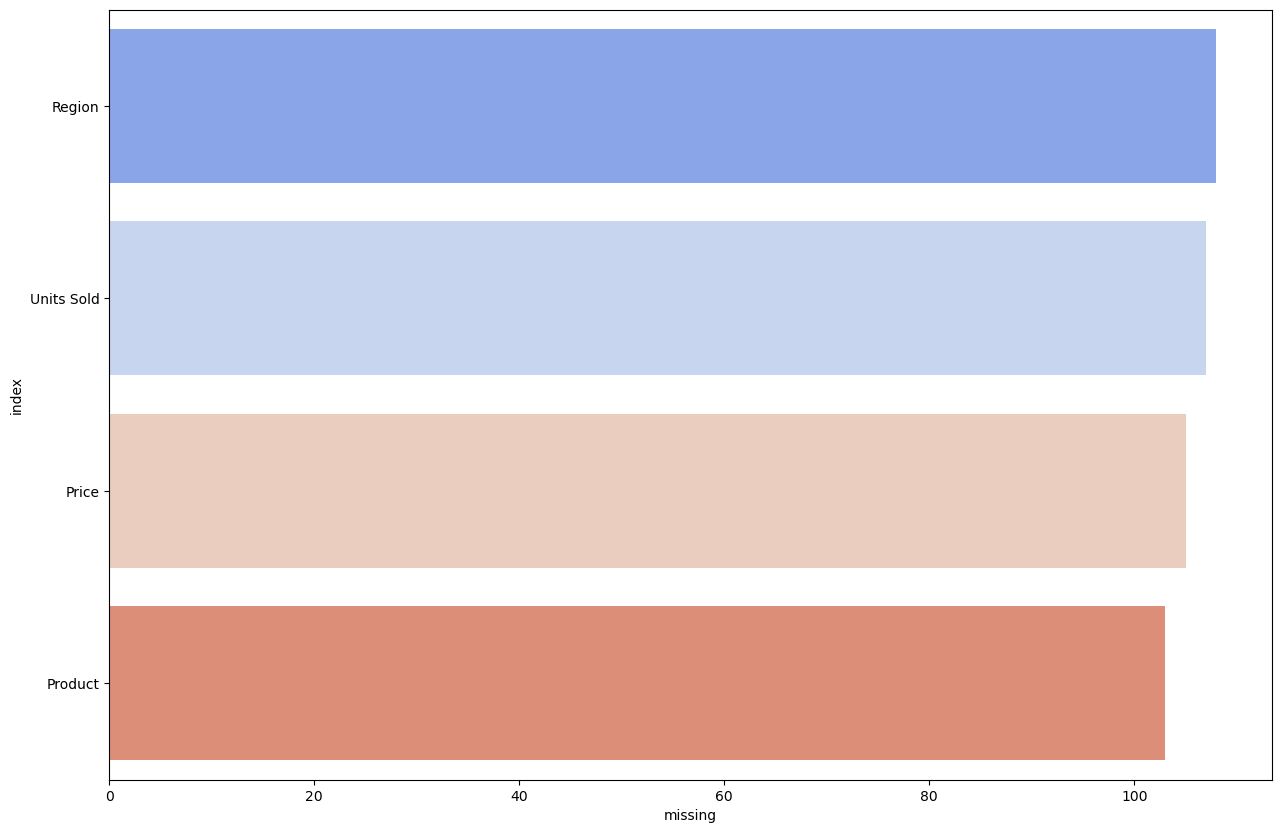

In [6]:
# Plot the missing value count as a bar chart
import matplotlib.pyplot as plt
import seaborn as sns

missing = df.isnull().sum()
print(missing)

missing = missing[missing>0]

miss = pd.DataFrame(missing, columns=['missing'])

miss = miss.reset_index()


miss.sort_values(by='missing', ascending=False, inplace=True)

plt.figure(figsize=(15, 10))
sns.barplot(y = miss['index'], x= miss.missing, palette='coolwarm')

From Above, we know that the 4 features (Product, Units Sold, Price, Product) have similar number of missing values, which is around 10% of the total number of data records (around 100 out of 1050 records). Thus, we may try to see if we simply drop the records that any missing value

In [7]:
df_no_missing = df.dropna() # drop all rows with missing data
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     684 non-null    object 
 1   Region      684 non-null    object 
 2   Price       684 non-null    float64
 3   Units Sold  684 non-null    float64
 4   Sale Date   684 non-null    object 
dtypes: float64(2), object(3)
memory usage: 32.1+ KB


### According to above result, dropping all records with missing value is suboptimal,
### because we have removed about 30% of the data records from the dataset, which is undesirable
### Another missing value imputation stratgey we can try is: 

### Data Visualization (EDA)